# Procesamiento de imágenes #04
### Transformaciones de intensidad

Dra. C. Miriela Escobedo Nicot

El término dominio espacial se refiere a la imagen plana en sí, y los métodos de esta categoría se basan en la manipulación directa de los píxeles de la image. En esta clase centraremos la atención en dos categorías importantes de procesamiento en el dominio espacial:
* Las transformaciones de intensidad (o escala de grises)
* Filtrado espacial

### Técnicas sobre el dominio espacial

Las técnicas del dominio espacial operan directamente sobre los píxeles de una imagen.
El procesamiento sobre el dominio espacial discutido en esta clase adopta la forma general.

$$g(x,y)=T[f(x,y)]$$

donde $f(x,y)$ es la imagen de entrada y $g(x,y)$ es la imagen de salida (procesada) y $T$ es un operador aplicado sobre $f$, definido sobre un entorno de puntos $(x,y)$.

Sin embargo, $T$ puede operar sobre un conjunto de imágenes, como por ejemplo la realización de la adición de $k$ imágenes para reducción de ruido.

### Operaciones con imágenes
* <b>Operaciones puntuales</b>: cada pixel de salida solo depende del correspondiente pixel de entrada.

![](images/18.png)

* <b>Operaciones de vecindad (o entorno local)</b>: el valor de salida depende de un entono cuadrado centrado en cada punto $(x, y)$ de la imagen de entrada.

### Operaciones en un entorno local
El centro de la región se mueve de pixel a pixel empezando, por ejemplo, en la esquina superior izquierda y, a medida que avanza, abarca distintos entornos.

El operador $T$ se aplica en cada ubicación $(x,y)$ para dar la salida, $g$, en cada localización. Solo los píxeles situados dentro del entorno (prefijado) se utilizan en el cálculo del valor de $g$ en $(x,y)$.

Su implementación computacional requiere que se preste cuidadosa atención a las clases de datos y rangos de valores.

Hay técnicas que utilizan entornos adaptativos, en cada punto se contruye un entorno, en el que se aplica el operador, que se adapta a la forma de la imagen o al operador que estamos utilizando.

### Histograma de una imagen

Una de las primeras herramientas que proporcionan información sobre las intensidades de una imagen (o colores) es el histograma.

#### Histograma
El histograma es una representación de la frecuencia relativa de cada color de una imagen.

Mide la frecuencia de ocurrencia (aparición) de cada nivel de gris de la imagen. Se corresponde con la función de distribución de niveles de intensidad.

#### $h(n_k) =$ <b>número de píxeles con nivel</b> $n_k$

* <b>Histograma relativo o normalizado</b>: Sus valores están entre 0, 1, con suma 1, pueden interpretarse como probabilidades de ocurrencia de cada nivel $n_k$

### Obtener histograma de una imagen

Para obtener el histograma de una imagen utilizaremos la función `histogram` que se encuentra en el módulo `exposure` de la biblioteca `skimage`

In [1]:
# Importamos la función con un nombre más corto
from skimage.exposure import histogram as imhist

A esta función le pasamos como parámetro la imagen a para la que deseamos calcular el histograma, y nos retornará dos valores, en el primero se encuentran los valores del histograma, y en el segundo se encuentra lo que llamamos bins o simplemente la longitud de las barras para facilitar el proceso de graficar el histograma.

Para simplificar el proceso trabajaremos por ahora solamente con imágenes en escala de grises.

Comencemos por cargar una imagen

In [2]:
from pylab import * # Primero cargamos nuestrar funciones báscias

In [3]:
lena = imread('dataset/lena_gray_256.tif') # Cargamos la imagen

In [4]:
hist, bin_centers = imhist(lena) # Obtener histograma y sus bins

Ahora procederemos a mostrar la imagen graficar el histograma obtenido

Text(0, 0.5, '# pixeles')

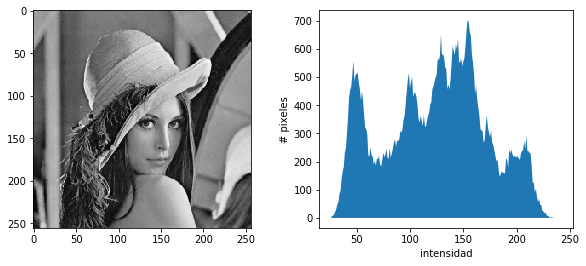

In [5]:
# Obtener lienzos para la imagen y para el histograma
_, (ax_image, ax_hist) = subplots(1, 2, figsize=(10, 4))

# Mostrar imagen en el primer lienzo
ax_image.imshow(lena, cmap="gray")

# Mostar histograma en el segundo lienzo
ax_hist.fill_between(bin_centers, hist)
ax_hist.set_xlabel('intensidad')
ax_hist.set_ylabel('# pixeles')

Para graficar el histograma hemos utilizado la función `fill_between` que se encarga de rellenar un área bajo una curva dados sus valore en $(x,y)$. También pudimos haber utilizado la función `plot` que solo se encarga de dibujar la curva sin rellenado.

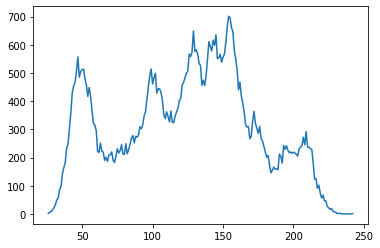

In [6]:
plot(bin_centers, hist)

##### Obtener histograma de una imagen a color

Hemos visto como obtener el histograma de una imagen en escala de grises, pero si deseasemos obtener el histograma de una imagen a color, recordemos que las imágenes a color poseen tres matrices para representar los canales de RGB. Lo que podriamos hacer sería extraer esos canales y obtener el histograma de cada uno de manera independiente.

In [7]:
# Obtendremos la imagen del dataset de skimage
from skimage.data import chelsea # Un gato (o gata)

In [8]:
cat = chelsea()

In [9]:
# Extraer canales de la imagen
R = cat[...,0] # Red
G = cat[...,1] # Green
B = cat[...,2] # Blue

In [10]:
# Hallar histograma para cada uno
hist_R, bin_centers_R = imhist(R)
hist_G, bin_centers_G = imhist(G)
hist_B, bin_centers_B = imhist(B)

Text(0, 0.5, '# pixeles')

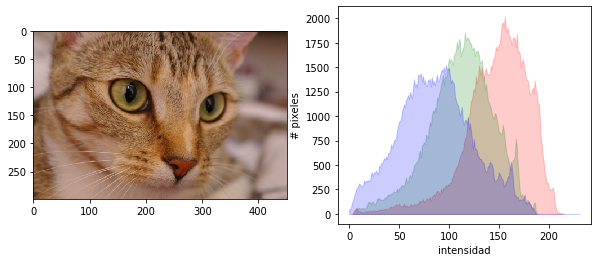

In [11]:
# Obtener lienzos para la imagen y para el histograma
_, (ax_image, ax_hist) = subplots(1, 2, figsize=(10, 4))

# Mostrar imagen en el primer lienzo
ax_image.imshow(cat, cmap="gray")

# Mostar histograma en el segundo lienzo
# alpha para habiltar transparencia
# color para especificar el color
ax_hist.fill_between(bin_centers_R, hist_R, alpha=0.2, color="red")
ax_hist.fill_between(bin_centers_G, hist_G, alpha=0.2, color="green")
ax_hist.fill_between(bin_centers_B, hist_B, alpha=0.2, color="blue")

ax_hist.set_xlabel('intensidad')
ax_hist.set_ylabel('# pixeles')

De la misma forma en que hallamos el histograma de una imagen a color (RGB) podemos aplicar técnicas de procesamiento de imágenes en escala de grises sobre imágenes en RGB, trabajando con cada una de sus componentes por separado.

### Transformaciones de la intensidad
Son funciones que actúan sobre un único pixel de la imagen modificando su valor de intensidad. También llamadas de modificación de contraste.

Debido a que solo depende de los valores de intensidad, y no explícitamente de $(x,y)$, las funciones de transformación de intensidad se escriben frecuentemente de forma simplificada como.

### $$s = T(r)$$

done $r$ denota la intensidad de $f$ y $s$ la intensidad de $g$, en cualquier punto $(x,y)$ de las imágenes.

Aplica los valores de intensidad de cada pixel a otros valores de acuerdo a cierta función de transformación.

* Transformaciones lineales: Pone el valor mínimo (min) a 0 y el máximos (max) a 255. Las intensidades se espacian de acuerdo a cierto factor. El factor para este aumento lineas de contraste es:

![](images/19.png)

* Transformaciones no lineales: Funciones monótonas de forma que mantienen la estructura básica de la imagen.

![](images/20.png)